# Segmentación de Clientes

**Objetivos:**

- Contruir un modelo que permita segmentar los clientes de manera efectiva.
- Poder visualizar los clientes de manera efectiva en 2D o 3D.
- Realizar un análisis RFM de los clientes.
- Dar etiquetas a los clusters de clientes encontrados.

In [1]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

## Cargar datos

- ORDERNUMBER: Número de identificación de la orden.
- QUANTITYORDERED: Cantidad de productos que se han ordenado.
- PRICEEACH: Precio de cada producto.
- ORDERLINENUMBER: Número de línea de la orden.
- SALES: Ingresos generados por la venta.
- ORDERDATE: Fecha y hora en que se realizó la orden.
- STATUS: Estado del envío de la orden (ej. "Enviado").
- QTR_ID: Identificador del trimestre del año en que se realizó la orden.
- MONTH_ID: Identificador del mes en que se realizó la orden.
- YEAR_ID: Año en que se realizó la orden.
- ADDRESSLINE1: Primera línea de la dirección del cliente.
- ADDRESSLINE2: Segunda línea de la dirección del cliente (puede estar vacía).
- CITY: Ciudad del cliente.
- STATE: Estado o región del cliente.
- POSTALCODE: Código postal del cliente.
- COUNTRY: País del cliente.
- TERRITORY: Territorio del cliente (puede estar vacío).
- CONTACTLASTNAME: Apellido del contacto del cliente.
- CONTACTFIRSTNAME: Nombre del contacto del cliente.
- DEALSIZE: Tamaño de la transacción (ej. "Pequeño", "Mediano").


In [2]:
data_path = Path("data")
data_df = pd.read_csv(data_path / "sales_data_sample.csv", sep=",", encoding='Latin-1')
data_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
data_df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [4]:
data_df[["MSRP", "PRODUCTCODE", "CUSTOMERNAME", "PHONE"]]

,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE
0,95,S10_1678,Land of Toys Inc.,2125557818
1,95,S10_1678,Reims Collectables,26.47.1555
2,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555
3,95,S10_1678,Toys4GrownUps.com,6265557265
4,95,S10_1678,Corporate Gift Ideas Co.,6505551386
...,...,...,...,...
2818,54,S72_3212,Euro Shopping Channel,(91) 555 94 44
2819,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655
2820,54,S72_3212,Euro Shopping Channel,(91) 555 94 44
2821,54,S72_3212,Alpha Cognac,61.77.6555


In [5]:
ORDERNUMBER = "ORDERNUMBER"
QUANTITYORDERED = "QUANTITYORDERED"
PRICEEACH = "PRICEEACH"
ORDERLINENUMBER = "ORDERLINENUMBER"
ORDERDATE = "ORDERDATE"
STATUS = "STATUS"
SALES = "SALES"
QTR_ID = "QTR_ID"
MONTH_ID = "MONTH_ID"
YEAR_ID = "YEAR_ID"
MSRP = "MSRP"
PRODUCTCODE = "PRODUCTCODE"
CUSTOMERNAME = "CUSTOMERNAME"
PHONE = "PHONE"
ADDRESSLINE1 = "ADDRESSLINE1"
ADDRESSLINE2 = "ADDRESSLINE2"
CITY = "CITY"
STATE = "STATE"
POSTALCODE = "POSTALCODE"
COUNTRY = "COUNTRY"
TERRITORY = "TERRITORY"
CONTACTLASTNAME = "CONTACTLASTNAME"
CONTACTFIRSTNAME = "CONTACTFIRSTNAME"
DEALSIZE = "DEALSIZE"

data_df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


## Visualización de datos

In [6]:
def get_duplicated(df: pd.DataFrame, field: str):
    return df[field][df[field].duplicated()]

def get_unique_item_count(df: pd.DataFrame, field: str):
    return df[field].value_counts()


In [7]:
# ORDERDATE
def parse_dates(df: pd.DataFrame):
    df = df.copy()
    df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
    df['DAY_ID'] = df['ORDERDATE'].dt.day
    df['TIME'] = df['ORDERDATE'].dt.time.astype(str)
    return df

data_df = parse_dates(data_df)

# The time part of the datetime is constant
# print(data_df[ORDERDATE].map(lambda x: str(x.time)).value_counts())
print(data_df[ORDERDATE].min())
print(data_df[ORDERDATE].max())

2003-01-06 00:00:00
2005-05-31 00:00:00


In [8]:
# ORDERNUMBER

dup = get_duplicated(data_df, ORDERNUMBER).iloc[1]
or_n = data_df[data_df[ORDERNUMBER] == dup]
display(or_n)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,DAY_ID,TIME
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,1,00:00:00
56,10134,27,100.00,5,3307.77,2003-07-01,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,1,00:00:00
82,10134,31,100.00,4,7023.98,2003-07-01,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Large,1,00:00:00
242,10134,20,100.00,1,2711.20,2003-07-01,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Small,1,00:00:00
806,10134,30,61.78,6,1853.40,2003-07-01,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Small,1,00:00:00
1468,10134,35,93.54,3,3273.90,2003-07-01,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,1,00:00:00
1566,10134,43,83.03,7,3570.29,2003-07-01,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,1,00:00:00


In [9]:
# COUNTRY
get_unique_item_count(data_df, COUNTRY)

COUNTRY
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: count, dtype: int64

In [10]:
# STATUS

# To map values of status into two classes
# 0: The order is not valid
# 1: The order was or will be valid
status_dict = {
    "Shipped": 1,
    "Cancelled": 0,
    "Resolved": 1,
    "On Hold": 1, # An optimistic approach
    "In Process": 1, # An optimistic approach
    "Disputed": 0,
}

get_unique_item_count(data_df, STATUS)

STATUS
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

In [11]:
# Given ORDERNUMBER   
order_df = data_df.groupby([
    ORDERNUMBER,
    # All the fields bellow remains constant for a given order
    ORDERDATE,
    QTR_ID,
    YEAR_ID,
    MONTH_ID,
    STATUS,
    CUSTOMERNAME,
    # CONTACTFIRSTNAME, 
    # CONTACTLASTNAME, 
    # PHONE,
    # CITY, 
    # STATE, 
    # COUNTRY,
    # TERRITORY,
    # POSTALCODE,
    # ADDRESSLINE1,
    # ADDRESSLINE2,
])

print(len(order_df))

client_df = data_df.groupby([
    CONTACTFIRSTNAME, 
    CONTACTLASTNAME, 
    # All the fields bellow remains constant for a given combination of CONTACTFIRSTNAME and CONTACTLASTNAME
    CITY,
    PHONE,
    STATE, 
    COUNTRY,
    TERRITORY,
    POSTALCODE,
    ADDRESSLINE1,
    ADDRESSLINE2,
])

print(len(client_df))


307
92


## Hipótesis de los datos

- Órdenes se identifican por ORDERNUMBER.
- Cada orden contiene varios productos.
- Los productos contienen precio unitario (PRICEEACH) y se pueden agregar varios (QUANTITYORDERED) al carrito en un orden (ORDERLINENUMBER).
- Dado algún criterio, por los productos se paga más en algunas ocasiones (diferencia entre PRICEEACH * QUANTITYORDERED y SALES)
- Los clientes se identifican por su la combinación de los campos CONTACTFIRSTNAME, CONTACTLASTNAME, CITY, STATE, COUNTRY, TERRITORY, PHONE, POSTALCODE, ADDRESSLINE1 y ADDRESSLINE2.
- Se asume que el análisis se hace el día de la última compra registrada.


In [12]:
def parse_client_info(df: pd.DataFrame):
    """
    Given a pandas DataFrame `df`, returns a DataFrame with client information, and a new DataFrame containing
    a new column named CLIENT_ID, where the id is the index of the client in the first DataFrame returned 
    """
    df = df.copy()
    client_fields = [
        CONTACTFIRSTNAME, 
        CONTACTLASTNAME, 
        CITY, 
        STATE, 
        COUNTRY,
        TERRITORY,
        POSTALCODE,
        ADDRESSLINE1,
        ADDRESSLINE2,
    ]
    client_df = df[client_fields].drop_duplicates(ignore_index=True)
    client_df["CLIENT_ID"] = client_df.index
    df = df.merge(client_df, on=client_fields, how="left")
    return client_df, df

client_df, join_df = parse_client_info(data_df)
join_df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'DAY_ID', 'TIME', 'CLIENT_ID'],
      dtype='object')

## Preprocesamiento de datos

- Se crea una tabla conteniendo los asociados a los clientes
- Se crea una tabla con la información que se considera relevante para la segmentación de los clientes
- Se filtran las órdenes que no se llegaron a cobrar (STATUS == 0)
- Se crea una tabla con la información RFM a partir de la tabla creada anteriormente


In [13]:
df = parse_dates(data_df)
client_df, df = parse_client_info(df)
df[STATUS] = df[STATUS].map(status_dict)

final_columns = [
    "CLIENT_ID",
    COUNTRY,
    QUANTITYORDERED,
    PRICEEACH,
    ORDERNUMBER,
    ORDERDATE,
    SALES,
    STATUS,
]


df = df[final_columns]
df = df[df[STATUS] == 1] # Filter only passed orders
df.head()

,CLIENT_ID,COUNTRY,QUANTITYORDERED,PRICEEACH,ORDERNUMBER,ORDERDATE,SALES,STATUS
0,0,USA,30,95.70,10107,2003-02-24,2871.00,1
1,1,France,34,81.35,10121,2003-05-07,2765.90,1
2,2,France,41,94.74,10134,2003-07-01,3884.34,1
3,3,USA,45,83.26,10145,2003-08-25,3746.70,1
4,4,USA,49,100.00,10159,2003-10-10,5205.27,1


In [14]:
import datetime

def get_rfm_info(df: pd.DataFrame, window_time_days=-1):
    all_max_date = df[ORDERDATE].max()
    all_max_datetime = datetime.datetime(all_max_date.year, all_max_date.month, all_max_date.day)

    if window_time_days > 0:
        lower_datetime = all_max_datetime - datetime.timedelta(days=window_time_days)
        lower_time_stamp = pd.Timestamp(lower_datetime)
        df = df[df[ORDERDATE] >= lower_time_stamp]

    client_grouped_df = df.groupby("CLIENT_ID")
    min_dates = client_grouped_df[ORDERDATE].min()
    max_dates = client_grouped_df[ORDERDATE].max()
    client_count = client_grouped_df[ORDERDATE].count()
    money_spent = client_grouped_df[SALES].sum()

    frequency_year = []
    recency = []
    for min_date, max_date, count in zip(min_dates, max_dates, client_count):
        # Interval between the last year of the data and the first purchase of the customer
        interval = all_max_date.year - min_date.year + 1 # Plus one to count the year of the first purchase
        frequency = count / interval
        frequency_year.append(frequency)

        max_datetime = datetime.datetime(max_date.year, max_date.month, max_date.day)

        current_recency_days = (all_max_datetime - max_datetime).days

        recency.append(current_recency_days)
    
    rfm_df = pd.DataFrame({
        "CLIENT_ID": client_grouped_df.groups.keys(),
        "RECENCY": recency,
        "FREQUENCY": client_count,
        "YEAR_FREQUENCY": frequency_year,
        "MONETARY_VALUE": money_spent,
    })
    return rfm_df

rfm_df = get_rfm_info(df)
rfm_df.describe()

,CLIENT_ID,RECENCY,FREQUENCY,YEAR_FREQUENCY,MONETARY_VALUE
count,92.00000,92.000000,92.000000,92.000000,92.000000
mean,45.50000,186.902174,29.880435,11.041667,106151.396848
std,26.70206,130.451040,29.180696,9.876794,103809.732026
min,0.00000,0.000000,3.000000,1.000000,9129.350000
25%,22.75000,87.500000,19.000000,6.666667,68690.575000
50%,45.50000,189.500000,25.000000,9.000000,85360.000000
75%,68.25000,230.500000,32.000000,13.000000,117963.115000
max,91.00000,508.000000,237.000000,79.000000,830461.560000


## Selección de modelo

Se seleccionan algoritmos de clustering para realizar la segmentación de los clientes, dado que no se tienen las etiquetas de estos.

### KMeans

Este algoritmo tiene como principal hipótesis que los clusters son linealmente separables. Además la cantidad de clusters se deben de conocer de antemano.

Para la selección de la cantidad de clusters existen dos métodos principales, el del codo y el de la silueta. El método del codo mide la distancia al cuadrado entre cada punto a su centroide, al probar con varias cantidades de clusters y graficar el comportamiento, la gráfica tiende a hacer un codo y en el punto donde hace esto es donde se escoge para la cantidad de clusters. El coeficiente de la silueta mide qué tan bien es la asignación de un punto al clúster que tiene por lo que mayor valor implica mejor asignación, por esto se selecciona la cantidad de clusters que dé el mayor valor de este coeficiente.


In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

def proprocess_rfm(data: pd.DataFrame):
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data[["RECENCY", "FREQUENCY", "MONETARY_VALUE"]])
    return data

def elbow_method(data: pd.DataFrame, max_clusters = 15):
    data = proprocess_rfm(data)

    inertia = []
    for i in range(1, max_clusters):
        km = KMeans(n_clusters=i) 
        km.fit(data)
        inertia.append(km.inertia_)

    plt.plot(range(1, max_clusters), inertia)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

def silhouette(data: pd.DataFrame, max_clusters = 15):
    data = proprocess_rfm(data)
    
    for k in range(2, max_clusters):
        km = KMeans(n_clusters=k)
        clusters = km.fit_predict(data)
        score = silhouette_score(data, clusters)
        print(f'Silhouette Score for k={k} is {score}')


## Segmentación RFM

Los datos son escalador entre 0 y 1. Luego se seleccionan los posibles valores de la cantidad de clusters para KMeans mediante los métodos del codo y de silueta, obteniendo 4 y 3 respectivamente.

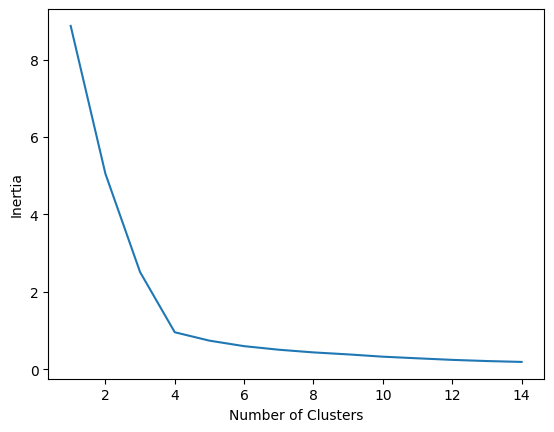

Silhouette Score for k=2 is 0.5816076011273931
Silhouette Score for k=3 is 0.6293334522657836
Silhouette Score for k=4 is 0.5736281382475197
Silhouette Score for k=5 is 0.43428403238947727
Silhouette Score for k=6 is 0.42500891517865214
Silhouette Score for k=7 is 0.41420817300891677
Silhouette Score for k=8 is 0.4215468413250895
Silhouette Score for k=9 is 0.4000407518426127
Silhouette Score for k=10 is 0.37643976218738356
Silhouette Score for k=11 is 0.4019099755304314
Silhouette Score for k=12 is 0.4254383688515906
Silhouette Score for k=13 is 0.4288366209100262
Silhouette Score for k=14 is 0.41412260829192404


In [16]:
elbow_method(rfm_df) # 4 clusters
silhouette(rfm_df) # 3 clusters


### Análisis de gráficos

- Se observa una fuerte correlación entre valor monetario y frecuencia.


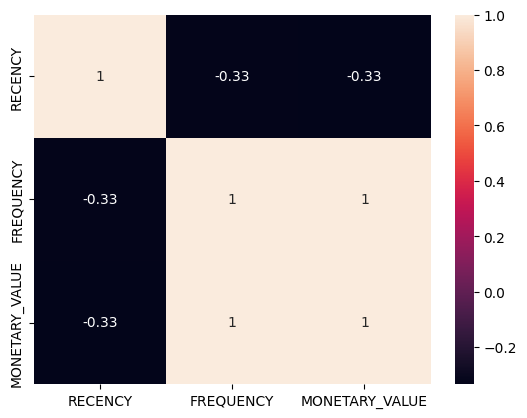

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

def plot_clusters(ax: plt.Axes, data: pd.DataFrame, x, y):
    # Plot clusters
    for i in range(data["Clusters"].nunique()):
        cluster_data = data[data["Clusters"] == i]
        ax.scatter(cluster_data[x], cluster_data[y], label='Cluster '+str(i))
    ax.legend()
    ax.set_xlabel(x)
    ax.set_ylabel(y)

def plot_all_clusters(data: pd.DataFrame):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    plot_clusters(ax1, data, "MONETARY_VALUE", "RECENCY")
    plot_clusters(ax2, data, "MONETARY_VALUE", "FREQUENCY")
    plot_clusters(ax3, data, "FREQUENCY", "RECENCY")
    fig.set_size_inches(16, 5)
    plt.show()

def analyse_kmeans_cluster_amount(n_clusters: int, rfm_data, rfm_df: pd.DataFrame):
    kmeans = KMeans(n_clusters=n_clusters, random_state=41212)
    clusters = kmeans.fit_predict(rfm_data)
    rfm_df_clusters = rfm_df.copy()
    rfm_df_clusters["Clusters"] = clusters
    plot_all_clusters(rfm_df_clusters)
    return rfm_df_clusters

def analyse_gaussian_cluster_amount(n_clusters: int, rfm_data, rfm_df: pd.DataFrame):
    gausian = GaussianMixture(n_components=n_clusters, random_state=41212)
    clusters = gausian.fit_predict(rfm_data)
    rfm_df_clusters = rfm_df.copy()
    rfm_df_clusters["Clusters"] = clusters
    plot_all_clusters(rfm_df_clusters)
    return rfm_df_clusters

def analyse_agglomerative_cluster_amount(n_clusters: int, rfm_data, rfm_df: pd.DataFrame):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = agglomerative.fit_predict(rfm_data)
    rfm_df_clusters = rfm_df.copy()
    rfm_df_clusters["Clusters"] = clusters
    plot_all_clusters(rfm_df_clusters)
    return rfm_df_clusters

def analyse_df_correlation(df: pd.DataFrame, annot=True):
    sns.heatmap(df.corr(), annot=annot)
    plt.show()

analyse_df_correlation(rfm_df[["RECENCY", "FREQUENCY", "MONETARY_VALUE"]])


### KMeans


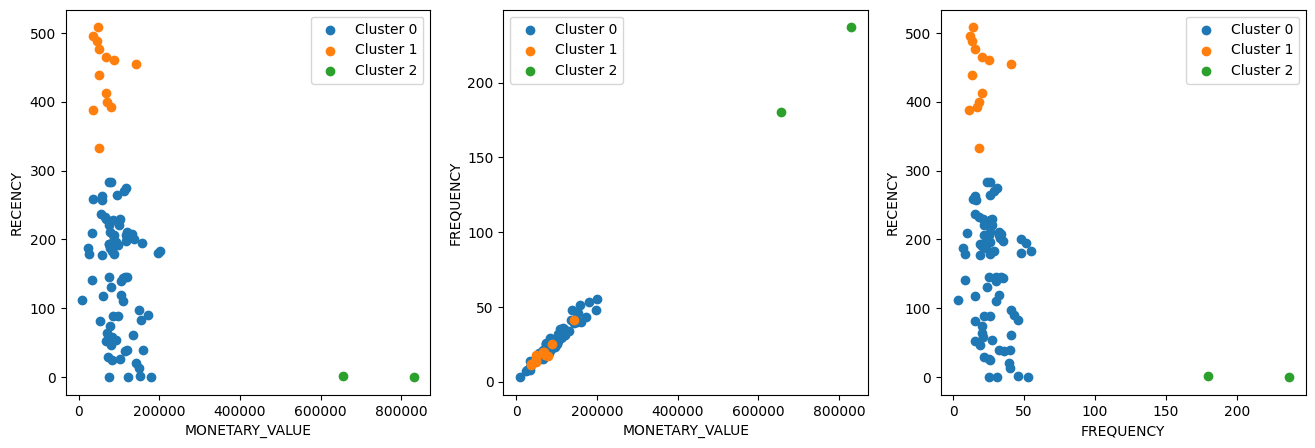

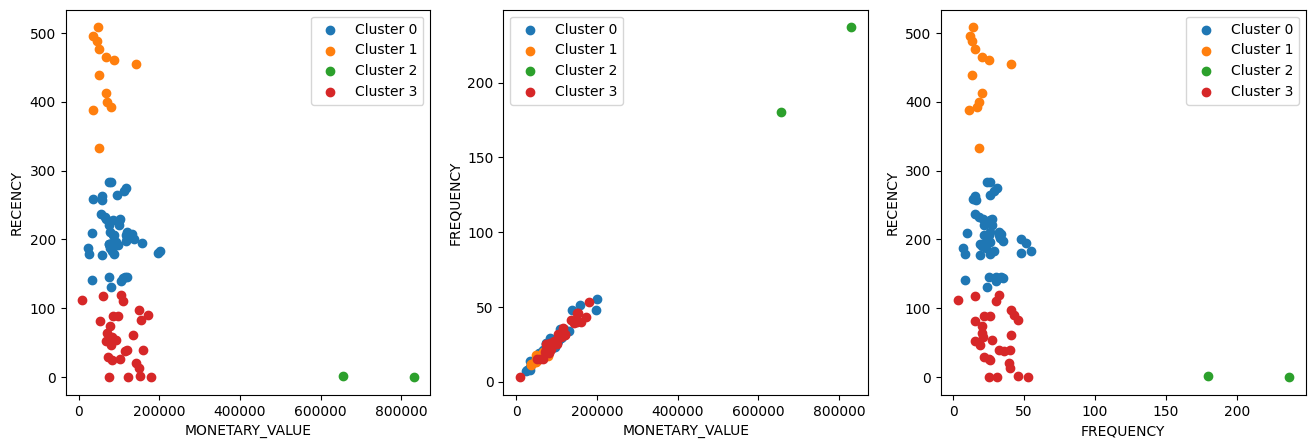

In [18]:
rfm_data = proprocess_rfm(rfm_df)

rfm_df_clusters3_kmeans = analyse_kmeans_cluster_amount(3, rfm_data, rfm_df)
rfm_df_clusters4_kmeans = analyse_kmeans_cluster_amount(4, rfm_data, rfm_df)

## Mezcla de Gaussianas



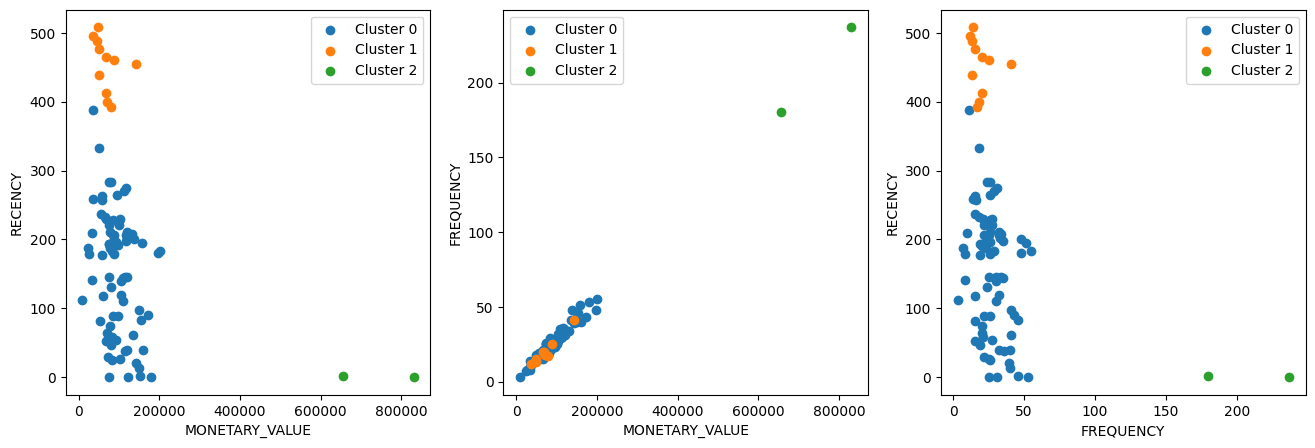

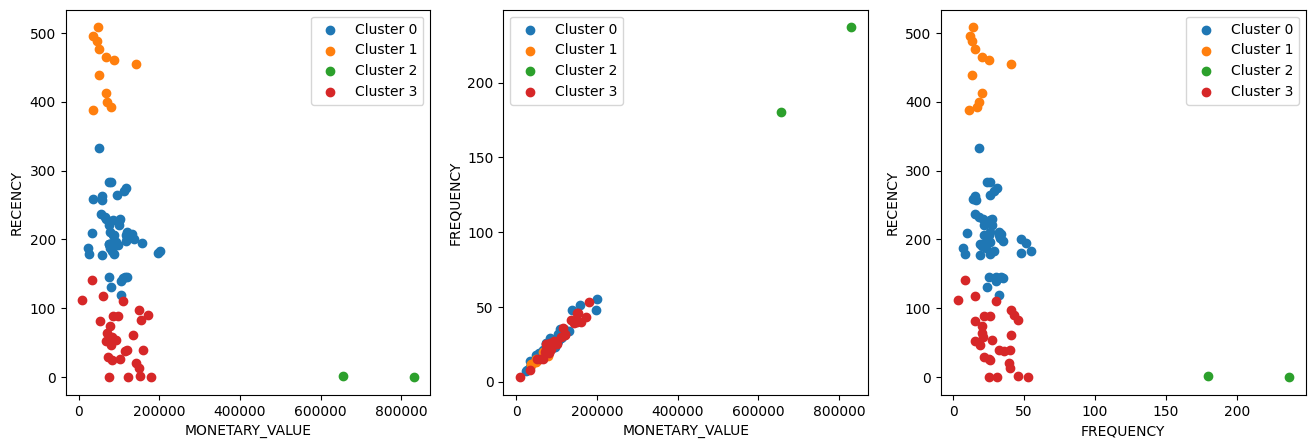

In [19]:
rfm_df_clusters3_gaussian = analyse_gaussian_cluster_amount(3, rfm_data, rfm_df)
rfm_df_clusters4_gaussian = analyse_gaussian_cluster_amount(4, rfm_data, rfm_df)

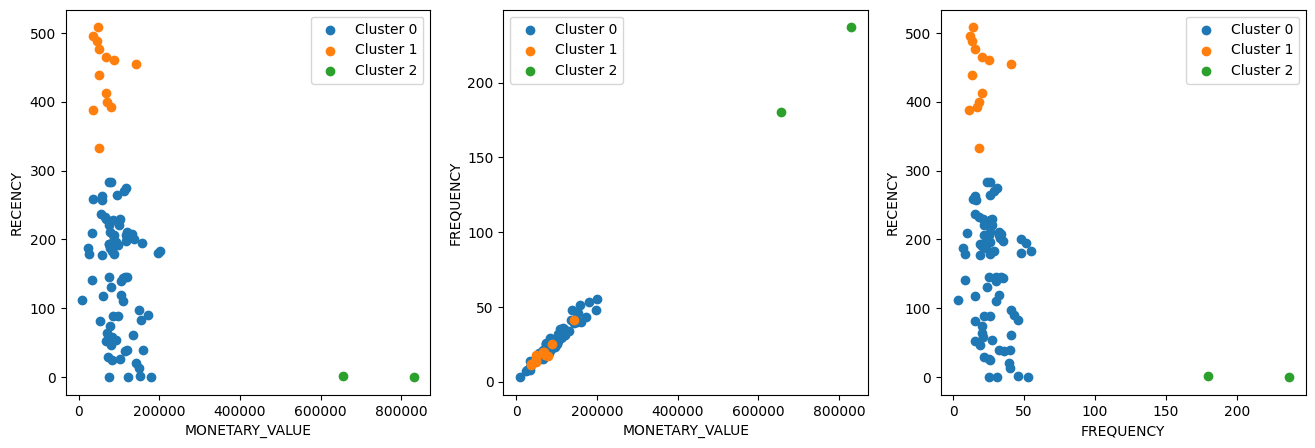

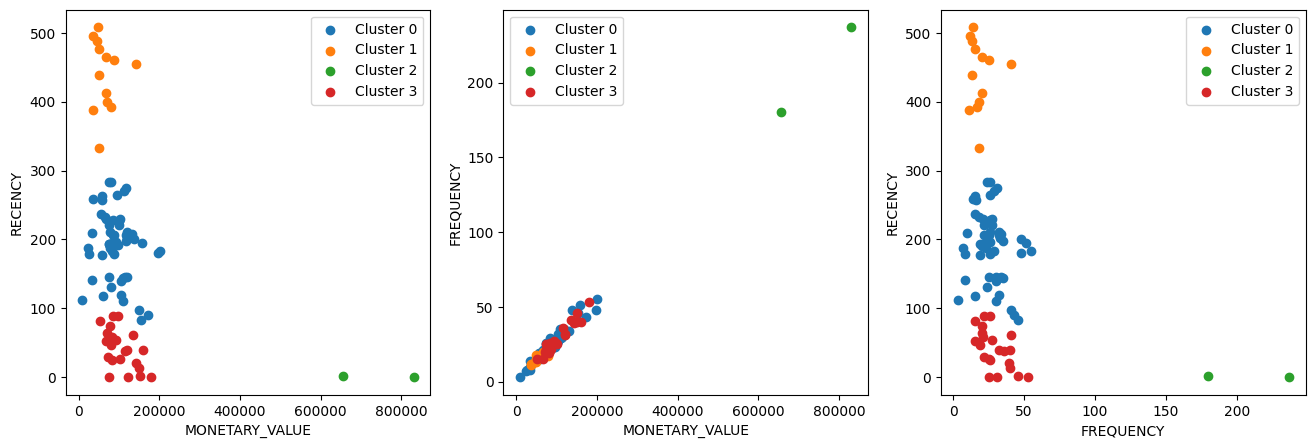

In [20]:
rfm_df_clusters3_agglomerative = analyse_agglomerative_cluster_amount(3, rfm_data, rfm_df)
rfm_df_clusters4_agglomerative = analyse_agglomerative_cluster_amount(4, rfm_data, rfm_df)

## Resumen 

- Ambas selecciones de clusters (3 o 4) tienen sentido.
- Visualmente los clusters son linealmente separables.
- El clúster verde representa los clientes que compran frecuentemente y mucho. Se podrían considerar clientes muy buenos.
- El clúster rojo (En gráficas de 4 clusters) representan clientes que compran de manera regular, aunque no hacen grandes gastos en sus compras. Se podrían considerar clientes regulares.
- El clúster azul (En gráficas de 4 clusters) representan clientes regulares que se están alejando del servicio. Se podrían considerar clientes en riesgo.
- El clúster naranja representan clientes que podían haber sido regulares, pero no han comprado hace más de un año. Se podrían considerar clientes en gran riesgo.

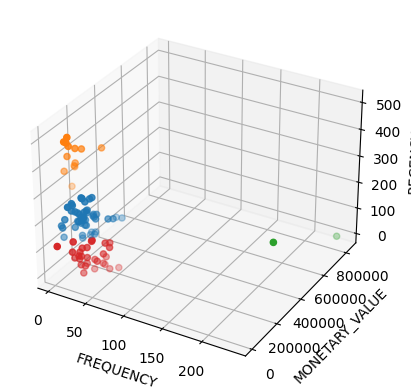

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-30), IntSlider(value=30, descriptio…

<function __main__.plot_3d_rfm_data.<locals>.update(elev=30, azim=30)>

In [21]:
%matplotlib notebook
%matplotlib inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from ipywidgets import interact

def plot_3d_rfm_data(rfm_df_clusters: pd.DataFrame):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(rfm_df_clusters["Clusters"].nunique()):
        cluster_data = rfm_df_clusters[rfm_df_clusters["Clusters"] == i]
        x = cluster_data["FREQUENCY"]
        y = cluster_data["MONETARY_VALUE"]
        z = cluster_data["RECENCY"]
        ax.scatter(x, y, z, label='Cluster '+str(i))

    ax.set_xlabel('FREQUENCY')
    ax.set_ylabel('MONETARY_VALUE')
    ax.set_zlabel('RECENCY')

    def update(elev=30, azim=30):
        ax.view_init(elev=elev, azim=azim)
        display(fig)

    return interact(update)

# KMeans Selected
rfm_df_clusters3 = rfm_df_clusters3_kmeans
rfm_df_clusters4 = rfm_df_clusters4_kmeans

plot_3d_rfm_data(rfm_df_clusters4)

## 

## Sintetizando información sobre el cliente

- Media, máximo y mínimo de QUANTITYORDERED, PRICEEACH, SALES
- One-hot encoding de los países del cliente
- Se le agrega la información de RFM

In [22]:
def drop_index(df: pd.DataFrame):
    df = df.copy()
    for column in df.columns:
        df[column].index = pd.Index([i for i in range(len(rfm_df))])
    return pd.DataFrame({x: df[x] for x in df.columns })

def get_client_information(df: pd.DataFrame, rfm_df: pd.DataFrame):
    client_grouped_df = df.groupby("CLIENT_ID")
    client_country = client_grouped_df[COUNTRY].first()
    client_grouped_mean = client_grouped_df[[QUANTITYORDERED, PRICEEACH, SALES]].mean()
    client_grouped_min = client_grouped_df[[QUANTITYORDERED, PRICEEACH, SALES]].min()
    client_grouped_max = client_grouped_df[[QUANTITYORDERED, PRICEEACH, SALES]].max()
    client_grouped_orders_count = client_grouped_df[ORDERNUMBER].count()
    
    assert len(rfm_df) == len(client_grouped_df)

    result_df = pd.DataFrame({
        "CLIENT_ID": client_grouped_df.groups.keys(),
        f"{QUANTITYORDERED}_MEAN": client_grouped_mean[QUANTITYORDERED],
        f"{PRICEEACH}_MEAN": client_grouped_mean[PRICEEACH],
        f"{SALES}_MEAN": client_grouped_mean[SALES],
        f"{QUANTITYORDERED}_MIN": client_grouped_min[QUANTITYORDERED],
        f"{PRICEEACH}_MIN": client_grouped_min[PRICEEACH],
        f"{SALES}_MIN": client_grouped_min[SALES],
        f"{QUANTITYORDERED}_MAX": client_grouped_max[QUANTITYORDERED],
        f"{PRICEEACH}_MAX": client_grouped_max[PRICEEACH],
        f"{SALES}_MAX": client_grouped_max[SALES],
        "ORDER_COUNT": client_grouped_orders_count,
        "COUNTRY": client_country,
    })

    result_df = drop_index(result_df)

    result_df = pd.merge(result_df, rfm_df, how="left", on="CLIENT_ID")
    result_df = pd.get_dummies(result_df, columns=[COUNTRY])
    clusters = result_df["Clusters"]
    result_df = pd.get_dummies(result_df, columns=["Clusters"])
    result_df["CLUSTERS"] = clusters
    return result_df


client_final_df = get_client_information(df, drop_index(rfm_df_clusters4))
client_final_df

,CLIENT_ID,QUANTITYORDERED_MEAN,PRICEEACH_MEAN,SALES_MEAN,QUANTITYORDERED_MIN,PRICEEACH_MIN,SALES_MIN,QUANTITYORDERED_MAX,PRICEEACH_MAX,SALES_MAX,...,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,Clusters_0,Clusters_1,Clusters_2,Clusters_3,CLUSTERS
0,0,33.628571,85.906857,3391.765143,20,30.06,1172.34,50,100.0,7140.76,...,False,False,False,False,True,True,False,False,False,0
1,1,34.951220,80.996098,3293.730244,22,36.21,977.67,50,100.0,8284.00,...,False,False,False,False,False,False,False,False,True,3
2,2,34.200000,85.947500,3928.517000,20,31.86,828.36,50,100.0,9720.00,...,False,False,False,False,False,False,False,False,True,3
3,3,35.333333,80.207000,3485.398667,20,30.59,834.67,49,100.0,8884.80,...,False,False,False,False,True,True,False,False,False,0
4,4,35.292683,81.846585,3655.670732,20,27.22,1007.14,50,100.0,8296.35,...,False,False,False,False,True,False,False,False,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,87,30.055556,78.812778,2789.631667,20,29.21,759.46,49,100.0,8427.02,...,False,False,False,False,False,False,True,False,False,1
88,88,35.052632,79.392105,3015.495789,21,41.71,875.91,50,100.0,5043.87,...,False,False,False,False,True,True,False,False,False,0
89,89,28.642857,79.718571,2499.565714,21,45.19,948.99,47,100.0,5676.84,...,False,False,False,False,False,True,False,False,False,0
90,90,34.750000,90.977500,4180.012500,20,63.38,1637.20,49,100.0,6275.72,...,False,False,False,False,False,True,False,False,False,0


## Visualizando y limpiando datos

- PRICEEACH_MAX es constante. Columna eliminada.
- No existe correlación entre los paises y las ventas. Columnas relacionadas eliminadas.
- Alta correlación entre ORDER_COUNT, FREQUENCY, YEAR_FREQUENCY y MONETARY_VALUE. Se queda solamente MONETARY_VALUE.

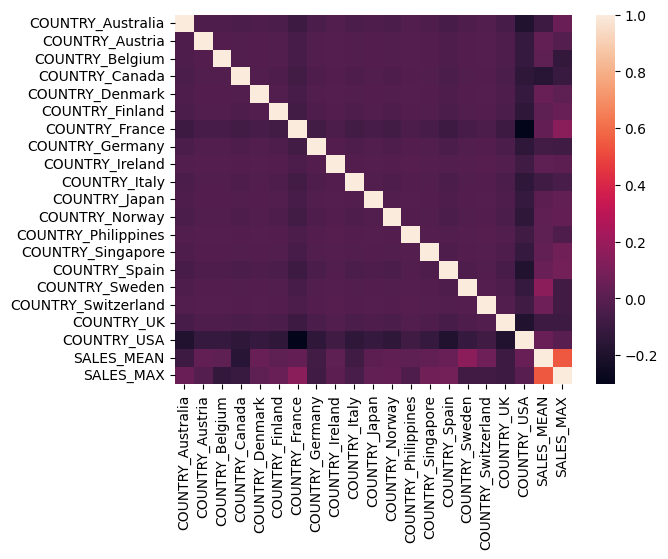

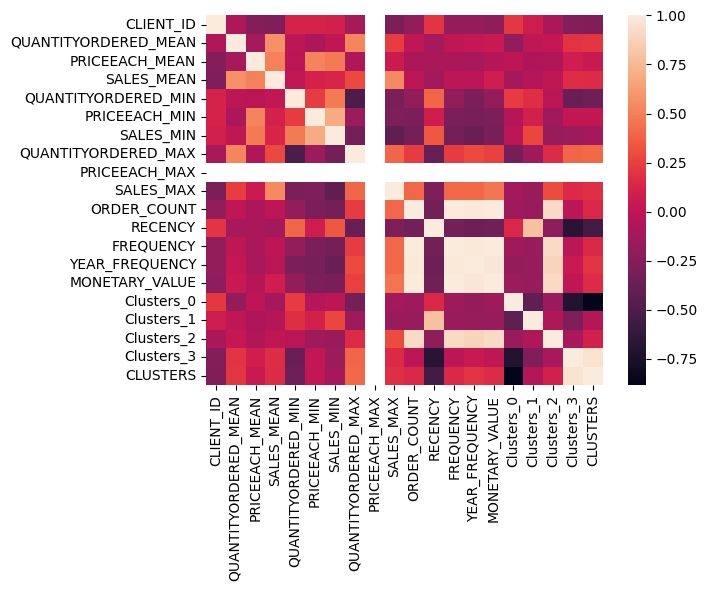

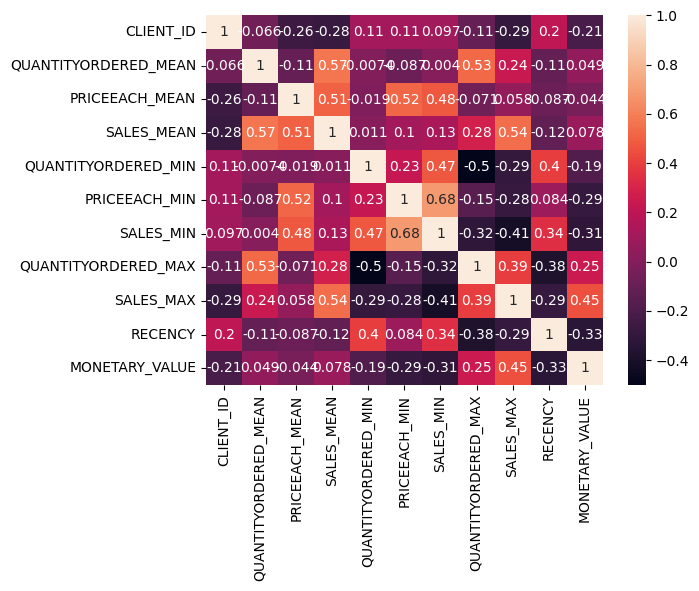

In [23]:
analyse_df_correlation(client_final_df[[x for x in client_final_df.columns if x.startswith(COUNTRY)] + ["SALES_MEAN", "SALES_MAX"]], False)
client_final_no_countries = client_final_df.drop([x for x in client_final_df.columns if x.startswith(COUNTRY)], axis=1)
analyse_df_correlation(client_final_no_countries, False)
client_final_no_countries.drop(["PRICEEACH_MAX", "ORDER_COUNT", "FREQUENCY", "YEAR_FREQUENCY"], axis=1, inplace=True)
analyse_df_correlation(client_final_no_countries.drop(["CLUSTERS", "Clusters_0", "Clusters_1", "Clusters_2", "Clusters_3"], axis=1))

In [24]:
client_final_no_countries.columns

Index(['CLIENT_ID', 'QUANTITYORDERED_MEAN', 'PRICEEACH_MEAN', 'SALES_MEAN',
       'QUANTITYORDERED_MIN', 'PRICEEACH_MIN', 'SALES_MIN',
       'QUANTITYORDERED_MAX', 'SALES_MAX', 'RECENCY', 'MONETARY_VALUE',
       'Clusters_0', 'Clusters_1', 'Clusters_2', 'Clusters_3', 'CLUSTERS'],
      dtype='object')

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def perform_pca_analysis(df: pd.DataFrame, components=3):
    to_process = df[['QUANTITYORDERED_MEAN', 'PRICEEACH_MEAN', 'SALES_MEAN',
       'QUANTITYORDERED_MIN', 'PRICEEACH_MIN', 'SALES_MIN',
       'QUANTITYORDERED_MAX', 'SALES_MAX', 'RECENCY', 'MONETARY_VALUE']]
    df_scaled = StandardScaler().fit_transform(to_process)

    pca = PCA(n_components=components, random_state=1234)
    data = pca.fit_transform(df_scaled)
    
    print("Explained variance ratio:", str(pca.explained_variance_ratio_))

    data = pd.DataFrame(data)
    data["Clusters"] = df["CLUSTERS"]
    return data

def perform_lda_analysis(df: pd.DataFrame, components=3):
    y = df["CLUSTERS"]
    to_process = df[['QUANTITYORDERED_MEAN', 'PRICEEACH_MEAN', 'SALES_MEAN',
       'QUANTITYORDERED_MIN', 'PRICEEACH_MIN', 'SALES_MIN',
       'QUANTITYORDERED_MAX', 'SALES_MAX', 'RECENCY', 'MONETARY_VALUE']]
    lda = LinearDiscriminantAnalysis(n_components=components)
    data = lda.fit_transform(to_process, y)

    print("Explained variance ratio:", str(lda.explained_variance_ratio_))

    data = pd.DataFrame(data)
    data["Clusters"] = y
    return data
    
def plot_3d_data(data: pd.DataFrame):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    columns = [x for x in data.columns if x != "Clusters"]

    for i in range(data["Clusters"].nunique()):
        cluster_data = data[data["Clusters"] == i]
        x = cluster_data[columns[0]]
        y = cluster_data[columns[1]]
        z = cluster_data[columns[2]]
        ax.scatter(x, y, z, label='Cluster '+str(i))

    ax.set_xlabel(str(columns[0]))
    ax.set_ylabel(str(columns[1]))
    ax.set_zlabel(str(columns[2]))

    def update(elev=30, azim=30):
        ax.view_init(elev=elev, azim=azim)
        display(fig)

    return interact(update)

def plot_2d_data(data: pd.DataFrame, axis):

    for i in range(data["Clusters"].nunique()):
        cluster_data = data[data["Clusters"] == i]
        x = cluster_data[axis[0]]
        y = cluster_data[axis[1]]
        plt.scatter(x, y, label='Cluster '+str(i))

    plt.legend()

    plt.show()


# Análisis PCA

El análisis no arroja buenos resultados, obteniendo valores bajos en la tasa de varianza explicada.

Explained variance ratio: [0.3226173  0.22189521 0.12911181]


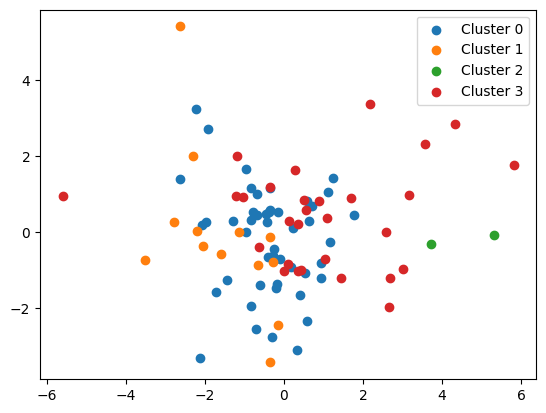

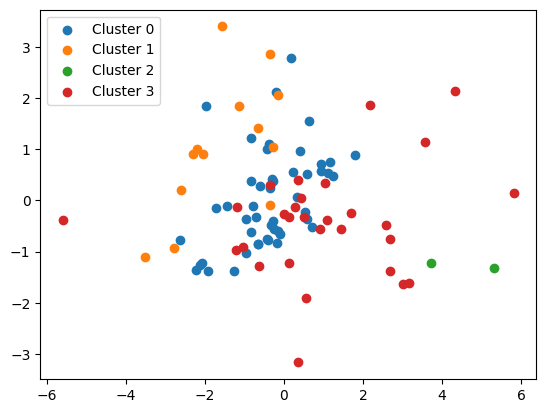

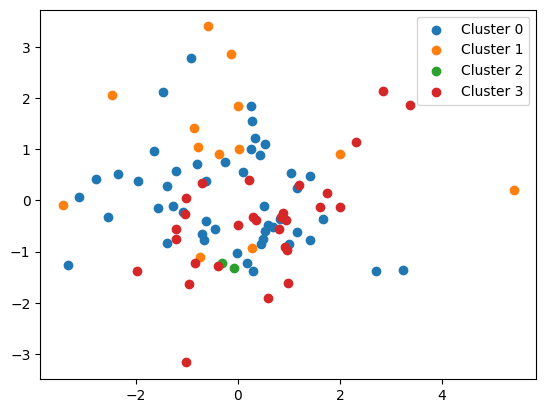

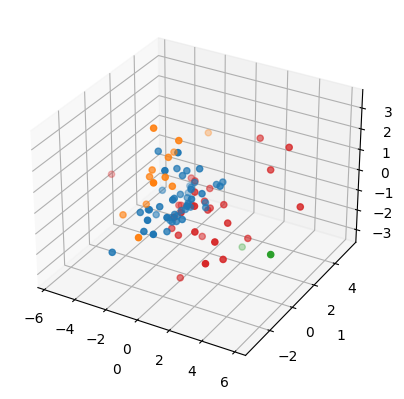

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-30), IntSlider(value=30, descriptio…

<function __main__.plot_3d_data.<locals>.update(elev=30, azim=30)>

In [26]:
pca_data = perform_pca_analysis(client_final_no_countries)
plot_2d_data(pca_data, [0, 1])
plot_2d_data(pca_data, [0, 2])
plot_2d_data(pca_data, [1, 2])
plot_3d_data(pca_data)


# Análisis LDA

El análisis arroja buenos resultados, en las componentes principales se observa los grupos definidos asociados a las clases encontradas en el análisis RFM.

Explained variance ratio: [0.60944421 0.38163863 0.00891716]


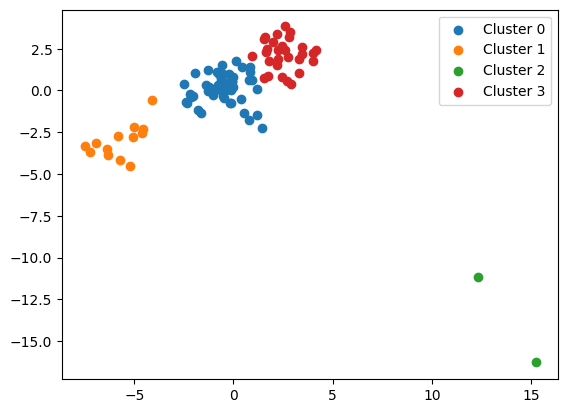

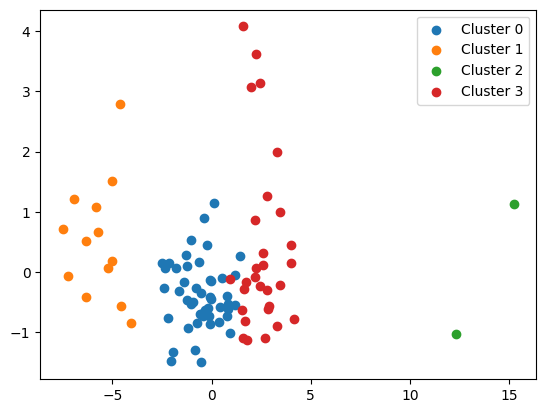

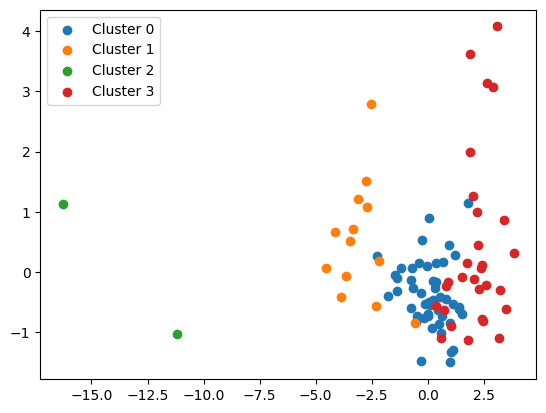

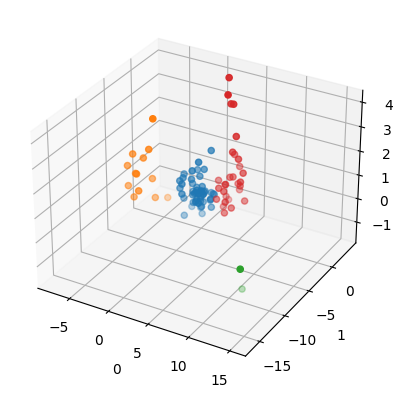

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-30), IntSlider(value=30, descriptio…

<function __main__.plot_3d_data.<locals>.update(elev=30, azim=30)>

In [27]:

lda_data = perform_lda_analysis(client_final_no_countries)
plot_2d_data(lda_data, [0, 1])
plot_2d_data(lda_data, [0, 2])
plot_2d_data(lda_data, [1, 2])
plot_3d_data(lda_data)


In [28]:
client_final_df.groupby("CLUSTERS")["CLIENT_ID"].count()

CLUSTERS
0    48
1    13
2     2
3    29
Name: CLIENT_ID, dtype: int64

## Resumen

- En el análisis RFM se encontraron de 3 a 4 clusters mediante los métodos utilizados
- Se segmentan los clientes en diferentes categorías de acuerdo al clúster al que pertenezca:
  - Low Risk Customer (48)
  - High Risk Customer (13)
  - Regular Customer (29)
  - Good Customer (2)


Kwai Yu is a Low Risk Customer
Paul Henriot is a Regular Customer
Daniel Da Cunha is a Regular Customer
Julie Young is a Low Risk Customer
Julie Brown is a Regular Customer
Juri Hirano is a Low Risk Customer
Martine Rance is a High Risk Customer
Veysel Oeztan is a Low Risk Customer
Julie Murphy is a Low Risk Customer
Dominique Perrier is a Regular Customer
Peter Ferguson is a Low Risk Customer
Michael Frick is a Low Risk Customer
William Brown is a Regular Customer
Julie King is a Regular Customer
Janine Labrune is a Regular Customer
Marta Hernandez is a Low Risk Customer
Matti Karttunen is a Regular Customer
Jonas Bergulfsen is a Low Risk Customer
Kyung Yu is a Regular Customer
Georg Pipps is a Regular Customer
Adrian Huxley is a Regular Customer
Violeta Benitez is a Regular Customer
Elizabeth Devon is a Regular Customer
Diego Freyre is a Good Customer
Christina Berglund is a Low Risk Customer
Mart¡n Sommer is a Low Risk Customer
Eric Natividad is a Regular Customer
Maria Hernandez is

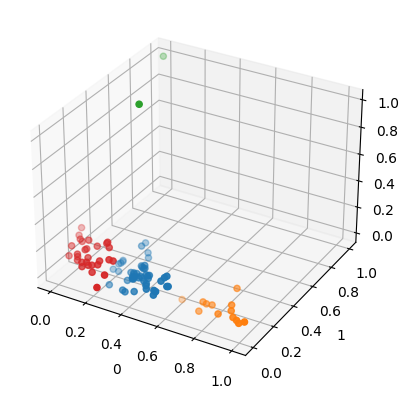

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-30), IntSlider(value=30, descriptio…

<function __main__.plot_3d_data.<locals>.update(elev=30, azim=30)>

In [29]:
from sklearn.pipeline import make_pipeline

def load_and_process_data(data_path: Path, with_model=False):
    """
    Load the data from `data_path` process it returning a dataframe with RFM data.
    If `with_model` is true, then also return the scaler, predictor and cluster to name dictionary.
    """
    df = pd.read_csv(data_path, sep=",", encoding='Latin-1')
    

    def get_model(n_clusters=4):
        """
        Returns the final predictor to classify the data
        """
        scaler = MinMaxScaler()
        kmeans = KMeans(n_clusters=n_clusters, random_state=41212)
        return scaler, kmeans, make_pipeline(scaler, kmeans)

    df = parse_dates(df)
    client_df, df = parse_client_info(df)
    df[STATUS] = df[STATUS].map(status_dict)
    
    final_columns = [
        "CLIENT_ID",
        COUNTRY,
        QUANTITYORDERED,
        PRICEEACH,
        ORDERNUMBER,
        ORDERDATE,
        SALES,
        STATUS,
    ]

    rfm_columns = ["FREQUENCY", "MONETARY_VALUE", "RECENCY"]

    df = df[final_columns]
    df = df[df[STATUS] == 1] # Filter only passed orders
    rfm_df = get_rfm_info(df)
    if with_model:
        scaler, predictor, pipeline = get_model()

        clusters = pipeline.fit_predict(rfm_df[rfm_columns])
        rfm_df["Clusters"] = clusters

        cluster_dicts = {
            0: "Low Risk Customer",
            1: "High Risk Customer",
            2: "Good Customer",
            3: "Regular Customer",
        }
        return client_df, scaler.fit_transform(drop_index(rfm_df[["RECENCY", "FREQUENCY", "MONETARY_VALUE"]])), predictor, cluster_dicts
    else:
        return client_df, scaler.fit_transform(drop_index(rfm_df[["RECENCY", "FREQUENCY", "MONETARY_VALUE"]]))

client_info, scaled_data, predictor, cluster_dicts = load_and_process_data(data_path / "sales_data_sample.csv", True)

classes = predictor.fit_predict(scaled_data)
d = pd.DataFrame(scaled_data)
d["Clusters"] = classes
for (i, row), cluster in zip(client_info.iterrows(), classes):
    print(row[CONTACTFIRSTNAME], row[CONTACTLASTNAME], "is a", cluster_dicts[cluster])
plot_3d_data(d)